# Used Car Auction Prices Prediction

## Loading Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_prices.csv", on_bad_lines='skip')

In [3]:
df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [4]:
df.size

8940976

In [5]:
df.shape

(558811, 16)

In [6]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


## Data Cleaning

In [8]:
# Check for Missing Values

missing_values = df.isnull().sum()
print(missing_values)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [9]:
# Percentage of missing values

missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


year             0.000000
make             1.843378
model            1.860915
trim             1.906011
body             2.361263
transmission    11.695010
vin              0.000000
state            0.000000
condition        2.110553
odometer         0.016821
color            0.134035
interior         0.134035
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64


In [10]:
# Columns with missing values

columns_with_missing = df.columns[df.isnull().any()]
print(columns_with_missing)


Index(['make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior'],
      dtype='object')


In [11]:
# Rows with missing data in a specific column

missing_rows = df[df['make'].isnull()]
missing_rows.shape

(10301, 16)

In [12]:
# Dropping rows where both 'make' and 'model' are missing

df = df.dropna(subset=['make', 'model'], how='all')

In [13]:
# for numerical category we are filling missing values with mean 

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    if df[col].isnull().sum() > 0: 
        df[col].fillna(df[col].mean(), inplace=True)

print(df.isnull().sum())

C:\Users\Shiva\AppData\Local\Temp\ipykernel_8408\1313660196.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


year                0
make                0
model              98
trim              350
body             2894
transmission    63592
vin                 0
state               0
condition           0
odometer            0
color             734
interior          734
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [14]:
# filling categorical missing values with NA / Mode

df['model'].fillna('Unknown', inplace=True)
df['trim'].fillna('Unknown', inplace=True)
df['body'].fillna('Unknown', inplace=True)
df['transmission'].fillna('Unknown', inplace=True)

df['color'].fillna(df['color'].mode()[0], inplace=True) 
df['interior'].fillna(df['interior'].mode()[0], inplace=True)  



C:\Users\Shiva\AppData\Local\Temp\ipykernel_8408\3457288904.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model'].fillna('Unknown', inplace=True)
C:\Users\Shiva\AppData\Local\Temp\ipykernel_8408\3457288904.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [15]:
missing_values = df.isnull().sum()
print(missing_values)

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


In [16]:
#checking for duplicates row 

duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


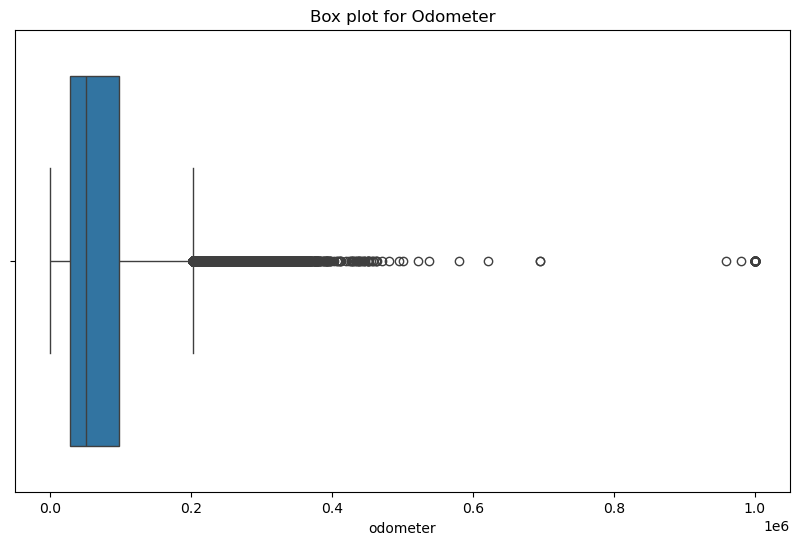

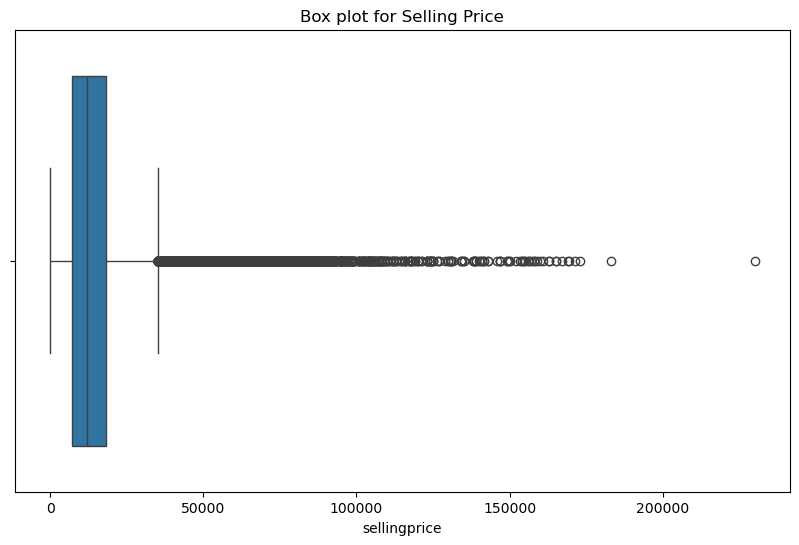

In [17]:
# Outlier Detection with Box Plots and Z-Scores

# Box plot for 'odometer' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Box plot for Odometer')
plt.show()

# Box plot for 'sellingprice' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sellingprice'])
plt.title('Box plot for Selling Price')
plt.show()

In [18]:
from scipy.stats import zscore

# Calculate Z-scores for the numerical columns
df['odometer_zscore'] = zscore(df['odometer'])
df['sellingprice_zscore'] = zscore(df['sellingprice'])

# Check for outliers (Z-score greater than 3 or less than -3)
odometer_outliers = df[df['odometer_zscore'].abs() > 3]
sellingprice_outliers = df[df['sellingprice_zscore'].abs() > 3]

print(f"Odometer outliers: {odometer_outliers.shape[0]}")
print(f"Selling price outliers: {sellingprice_outliers.shape[0]}")

Odometer outliers: 5279
Selling price outliers: 6826


In [19]:
# Remove rows where odometer or sellingprice is an outlier (Z-score > 3 or < -3)

df = df[(df['odometer_zscore'].abs() <= 3) & (df['sellingprice_zscore'].abs() <= 3)]


## Feature Engineering

In [20]:
# feature extraction 

df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
df['year'] = df['saledate'].dt.year.astype(int)
df.head(1)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_8408\1340957828.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,odometer_zscore,sellingprice_zscore
0,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00,-0.961872,0.801928


In [21]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,odometer_zscore,sellingprice_zscore
0,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00,-0.961872,0.801928
1,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16 04:30:00+00:00,-1.098834,0.801928


In [22]:
# removing unwanted column

df = df.drop(columns=['vin','saledate','odometer_zscore','sellingprice_zscore'])
df.head(1)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2014,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500


In [23]:
# saving dataset for data visualization

df = df.to_csv('data_visualization.csv', index=False)

In [24]:
# one-hot encoding  for categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

high_cardinality_columns = ['make', 'model', 'trim','body','transmission','state', 'color','interior', 'seller']  # Adjust the columns accordingly
for col in high_cardinality_columns:
    df[col] = le.fit_transform(df[col].fillna('Unknown'))

In [25]:
df.head(1)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2014,23,622,964,33,1,3,5.0,16639.0,17,1,6997,20500,21500


##  Model Selection and Training

In [29]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop(columns=['sellingprice'])  
y = df['sellingprice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [31]:
# Train the model

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Predict on test set

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

feature_importances = rf_model.feature_importances_
print(f"Feature Importances:\n{pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)}")

Mean Absolute Error (MAE): 912.3519553572539
Root Mean Squared Error (RMSE): 1400.62308219351
R-squared (R²): 0.9717793305140652
Feature Importances:
mmr             0.962813
condition       0.011135
odometer        0.006945
seller          0.003776
trim            0.002698
state           0.002673
model           0.002608
color           0.001825
body            0.001780
make            0.001653
interior        0.001217
transmission    0.000564
year            0.000313
dtype: float64
